In [2]:

# since this skvideo does not support images yet
import skimage.io
import numpy as np
import time
np.float = np.float64
np.int = np.int_
import skvideo.io
import skvideo.utils
import skvideo.datasets
import matplotlib.pyplot as plt

In [3]:
def plot_pts(pts, color='blue', size=5, label=False, transpose=False, swap=False, fs=5, labels=None):
    if transpose:
        x, y = pts[1, :], pts[0, :]
    else:
        x, y = pts[:, 0], pts[:, 1]
    if swap:
        temp = x
        x = y
        y = temp
    if label:
        if not labels: labels = [i for i in range(len(x))]
        [plt.text(x[i], y[i], f'{labels[i]}', fontsize=fs, ha='right', color=color) for i in range(len(x))]
    plt.scatter(x,y, color=color, s=size)
def save_img(fname, img_out, out_dir = 'img_out/'):
    if '.jpg' not in fname:
        fname = fname + '.jpg'
    full_name = out_dir + '/' + fname
    # img_out = np.clip(img_out, a_min=0, a_max=1)
    img_out = (img_out).astype(np.uint8)

    plt.imsave(full_name, img_out)
def save_from_plt(fname, out_dir='img_out/'):
    plt.savefig(out_dir+fname, bbox_inches='tight')
img_out = 'img_out/'
img_in = 'img_in/'
def load_arr(fname):
    if '.npz' in fname:
        arr = []
        loaded = np.load(img_out+fname)
        for i in range(499):
            arr.append(loaded['arr_{0}'.format(i)])
        return arr
    else:
        return np.load(img_out+fname)


## Load in Video

In [4]:
filename = 'downscaled.mp4'
filename_yuv = "n_box.yuv"

# first produce a yuv for demonstration
vid = skvideo.io.vread(filename)
skvideo.io.vwrite(filename_yuv, vid)
T, M, N, C = vid.shape
print(T, M, N, C)


499 1280 720 3


In [5]:
vid_rgb = skvideo.io.vread(filename_yuv, height=M, width=N)

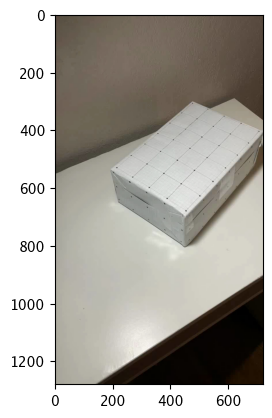

In [5]:
plt.imshow(vid_rgb[0,...])

In [61]:
points_file = 'points.txt'
points = np.loadtxt(points_file, delimiter=',')
points *= 2/3 #downscale since downsampled from 1920x1080 to 1280x1080

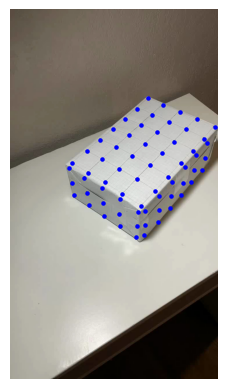

In [62]:
frame = vid_rgb[0,...]
plot_pts(points, label=False, fs=6)
plt.imshow(frame)
plt.axis('off')
save_from_plt('keypoints')


## Define points in 3D space

In [6]:
# 5x3, 7x5, 6x3
## Points top
# Define the grid parameters
l, w = 7, 5
x_spacing, y_spacing, z_spacing = 7, 7, 1
x_start, y_start, z_start = 2, 1, 17
x_end, y_end, z_end = x_spacing*(l-1) + x_start, y_spacing*(w-1)+y_start, z_start

# Create arrays of x, y, and z coordinates using meshgrid
x_values = np.arange(x_start, x_end + x_spacing, x_spacing)
y_values = np.arange(y_start, y_end + y_spacing, y_spacing)
z_values = np.arange(z_start, z_end + z_spacing, z_spacing)

# Use meshgrid to create 3D arrays of x, y, and z coordinates
x_grid, y_grid, z_grid = np.meshgrid(x_values, y_values, z_values, indexing='ij')

# Stack the x, y, and z coordinates to create an array of points
points_array = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))
sort_indices = np.lexsort((points_array[:, 2], points_array[:, 0], points_array[:, 1]))
top_sorted_points_array = points_array[sort_indices]
top_sorted_points_array.shape

(35, 3)

In [7]:
## Points right
# Define the grid parameters
l, w = 6, 3
x_spacing, y_spacing, z_spacing = 7, 1, 7
x_start, y_start, z_start = 2, 0, 2
x_end, y_end, z_end = x_spacing*(l-1) + x_start, y_start, (w-1)*z_spacing+z_start

# Create arrays of x, y, and z coordinates using meshgrid
x_values = np.arange(x_start, x_end + x_spacing, x_spacing)
y_values = np.arange(y_start, y_end + y_spacing, y_spacing)
z_values = np.arange(z_start, z_end + z_spacing, z_spacing)

# Use meshgrid to create 3D arrays of x, y, and z coordinates
x_grid, y_grid, z_grid = np.meshgrid(x_values, y_values, z_values, indexing='ij')

# Stack the x, y, and z coordinates to create an array of points
points_array = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))
sort_indices = np.lexsort((points_array[:, 0], -points_array[:, 2], points_array[:, 1]))
right_sorted_points_array = points_array[sort_indices]
right_sorted_points_array.shape

(18, 3)

In [8]:
## Points left
# Define the grid parameters
l, w = 5, 3
x_spacing, y_spacing, z_spacing = 1, 7, 7
x_start, y_start, z_start = 0, 2, 2
x_end, y_end, z_end = x_start, y_spacing*(l-1)+y_start, (w-1)*z_spacing+z_start

# Create arrays of x, y, and z coordinates using meshgrid
x_values = np.arange(x_start, x_end + x_spacing, x_spacing)
y_values = np.arange(y_start, y_end + y_spacing, y_spacing)
z_values = np.arange(z_start, z_end + z_spacing, z_spacing)

# Use meshgrid to create 3D arrays of x, y, and z coordinates
x_grid, y_grid, z_grid = np.meshgrid(x_values, y_values, z_values, indexing='ij')

# Stack the x, y, and z coordinates to create an array of points
points_array = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))
sort_indices = np.lexsort((points_array[:, 1], -points_array[:, 2], points_array[:, 0]))
left_sorted_points_array = points_array[sort_indices]
left_sorted_points_array.shape

(15, 3)

In [9]:
all_3d_points = np.concatenate((top_sorted_points_array,right_sorted_points_array,left_sorted_points_array), axis=0)
all_3d_points.shape

(68, 3)

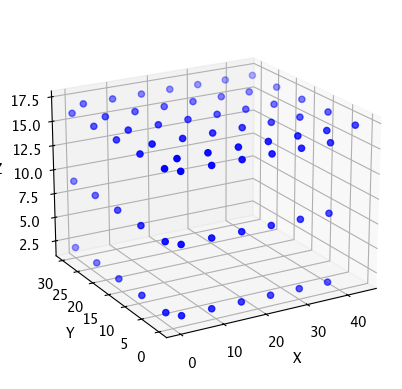

In [9]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(points, label=False, fname=''):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', marker='o')
    if label:
        [ax.text(points[i,0], points[i,1], points[i,2], f'{i}', fontsize=10, ha='right', color='green') for i in range(len(points))]
    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(20,-120)
    # Show the plot
    if fname: save_from_plt(fname)
    plt.show()
    
plot_3d(all_3d_points, label=False, fname='3d_plot')

## Keypoint Tracking

In [64]:
from skimage.feature import corner_harris, peak_local_max
from skimage.color import rgb2gray
def get_top_k(h, pts, k=4000):
    # idx = np.argpartition(h.ravel(), h.size-k)[-k:]
    # return np.column_stack(np.unravel_index(idx, h.shape))
    sub_h = h[pts[:,0], pts[:,1]]
    sorted_idx = np.argsort(-sub_h)[:k]
    # print(sorted_idx.shape, sub_h.shape, pts.shape)
    return pts[sorted_idx]
def get_harris_corners(im, edge_discard=20, k=None, sigma=1, min_distances=5):
    """
    This function takes a b&w image and an optional amount to discard
    on the edge (default is 5 pixels), and finds all harris corners
    in the image. Harris corners near the edge are discarded and the
    coordinates of the remaining corners are returned. A 2d array (h)
    containing the h value of every pixel is also returned.

    h is the same shape as the original image, im.
    coords is n (xs, ys) x 2
    """
    if len(im.shape) == 3:
        im = rgb2gray(im)

    assert edge_discard >= 20

    # find harris corners
    h = corner_harris(im, method='eps', sigma=sigma)
    coords = peak_local_max(h, min_distance=min_distances, indices=True)

    # discard points on edge
    edge = edge_discard  # pixels
    mask = (coords[:, 0] > edge) & \
           (coords[:, 0] < im.shape[0] - edge) & \
           (coords[:, 1] > edge) & \
           (coords[:, 1] < im.shape[1] - edge)
    coords = coords[mask]
    if k:
        coords = get_top_k(h, coords, k=k)
    coords[:, [0, 1]] = coords[:, [1, 0]]
    return h, coords


def dist2(x, c):
    """
    dist2  Calculates squared distance between two sets of points.

    Description
    D = DIST2(X, C) takes two matrices of vectors and calculates the
    squared Euclidean distance between them.  Both matrices must be of
    the same column dimension.  If X has M rows and N columns, and C has
    L rows and N columns, then the result has M rows and L columns.  The
    I, Jth entry is the  squared distance from the Ith row of X to the
    Jth row of C.

    Adapted from code by Christopher M Bishop and Ian T Nabney.
    """
    
    ndata, dimx = x.shape
    ncenters, dimc = c.shape
    assert(dimx == dimc, 'Data dimension does not match dimension of centers')

    return (np.ones((ncenters, 1)) * np.sum((x**2).T, axis=0)).T + \
            np.ones((   ndata, 1)) * np.sum((c**2).T, axis=0)    - \
            2 * np.inner(x, c)

<>:60: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:60: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/0q/5pxc03555m17r77zjkftg0bw0000gn/T/ipykernel_74093/3622135109.py:60: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(dimx == dimc, 'Data dimension does not match dimension of centers')


In [70]:
# Matches selected points to the known set of keypoints, removing duplicates
def match_pts_to_prev(curr, prev, real_idx, threshold = 0.5):
    # Calculate pairwise distances between points in curr and prev
    distances = dist2(curr, prev)
    closest_indices = np.argmin(distances, axis=1) # Find the indices of the closest points
    min_distances = distances[np.arange(len(curr)), closest_indices] # Distances of the matches
    curr_pts_with_best_match = np.argsort(min_distances) # The indices that would sort the best_match distances

    pairings = {}
    prev_idx_matched = set()
    for curr_idx in curr_pts_with_best_match:
        match_idx = real_idx[closest_indices[curr_idx]]
        if match_idx not in prev_idx_matched:
            # print(min_distances[curr_idx])
            if min_distances[curr_idx] < threshold:
                prev_idx_matched.add(match_idx)
                pairings[curr_idx] = match_idx
    best_pts = curr[list(pairings.keys())]
    return pairings, best_pts

# Identify keypoints in curr frame based on prev frame's keypoints
def extract_keypoints(img, prev_pts, real_idx, k=1000, threshold=5, sigma=1, min_distances=1):
    img_harris = get_harris_corners(img, k=k, sigma=sigma, min_distances=min_distances)
    h_val, coords = img_harris
    pairings, best_pts = match_pts_to_prev(coords, prev_pts, real_idx, threshold=threshold)
    return pairings, best_pts

In [73]:
frame = vid_rgb[0, ...]
starting_idx = list(range(68))
pairings, new_pts = extract_keypoints(frame, points, starting_idx, sigma=8, min_distances=5, k=1000, threshold=30)
print(new_pts.shape)

(51, 2)


/var/folders/0q/5pxc03555m17r77zjkftg0bw0000gn/T/ipykernel_74093/3622135109.py:28: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  coords = peak_local_max(h, min_distance=min_distances, indices=True)


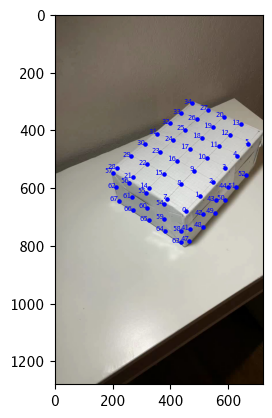

In [72]:
plot_pts(new_pts, label=True, labels=list(pairings.values()))
plt.imshow(frame)

/var/folders/0q/5pxc03555m17r77zjkftg0bw0000gn/T/ipykernel_74093/3622135109.py:28: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  coords = peak_local_max(h, min_distance=min_distances, indices=True)


(200, 2)


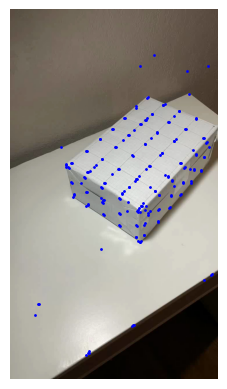

In [82]:
frame = vid_rgb[0, ...]
_, coords = get_harris_corners(frame, sigma=1, min_distances=1, k=200)
print(coords.shape)
plot_pts(coords, label=False, size=1)
plt.imshow(frame)
plt.axis('off')
save_from_plt('harris_pts')

In [ ]:
prev_pts = points
key_points_all = []
key_points_nums = []
real_idx = list(range(68))
for t in range(T):
    
    curr_frame = vid_rgb[t, ...]
    pairings, curr_pts = extract_keypoints(curr_frame, prev_pts, real_idx, sigma=1, min_distances=1, k=200, threshold=20)
    key_points_all.append(curr_pts)
    real_idx = list(pairings.values())
    key_points_nums.append(real_idx)
    if t % 50 == 0:
        print("found {0} points at frame {1}".format(len(curr_pts), t))
    prev_pts = curr_pts

# np.savetxt(img_out+ 'keypts.txt', np.asarray(key_points_all))
# np.savetxt(img_out+ 'keypts_nums.txt', np.asarray(key_points_nums))

In [52]:
np.savez(img_out+'keypts.npz', *key_points_all)
np.savez(img_out+'keypts_nums.npz', *key_points_nums)

In [18]:
def get_frame(frame_num):
    return vid_rgb[frame_num, ...]
def get_frame_keypts(frame_num):
    return key_points_all[frame_num]
def get_frame_keypts_idx(frame_num):
    return key_points_nums[frame_num]
def plot_img_with_pts(frame_num, points=[]):
    if len(points) == 0: points = get_frame_keypts(frame_num)
    plot_pts(points, label=True, labels=get_frame_keypts_idx(frame_num))
    plt.imshow(get_frame(frame_num))

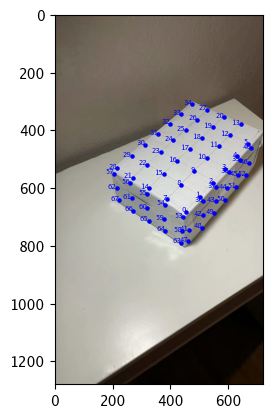

In [908]:
plot_img_with_pts(4)

found 46 matches


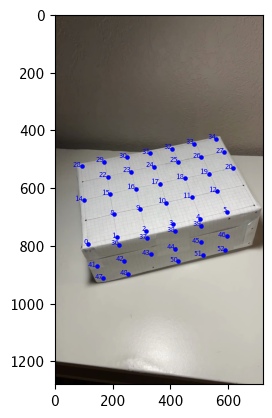

In [909]:
frame_num = 495
plt.imshow(vid_rgb[frame_num, ...])
print("found {0} matches".format(key_points_all[frame_num].shape[0]))
plot_pts(key_points_all[frame_num], label=True, labels=get_frame_keypts_idx(frame_num))

In [1125]:
import cv2

# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Video codec
# out = cv2.VideoWriter(output_video_path, fourcc, 30.0, (output_width, output_height))
labeled_frames = []

for frame_num in range(T):
    curr_frame = get_frame(frame_num).copy()
    curr_keypts = get_frame_keypts(frame_num)
    
    # Plot keypoints
    for i in range(len(curr_keypts)):
        x,y = curr_keypts[i]
        cv2.circle(curr_frame, (x, y), radius=5, color=(0, 255, 0), thickness=-1)  # Thickness=-1 fills the circle
    labeled_frames.append(curr_frame)

In [10]:
def save_video_from_frames(frames, fname):
    frames_np = np.asarray(frames)
    skvideo.io.vwrite(img_out+fname+'.mp4', frames_np, inputdict={'-r': '60'}, backend='ffmpeg')

In [1129]:

save_video_from_frames(labeled_frames, 'keypoints_tracking')

## Projection matrix calculation

In [14]:
def compute_p(world_coord, pixel_coord):
    n = len(world_coord)
    assert len(world_coord) == len(pixel_coord)
    world_coord = np.asarray(world_coord)
    pixel_coord = np.asarray(pixel_coord)
    A = np.zeros((n*2,11))
    A = np.zeros((n*2,11))
    A[::2, :3] = world_coord
    A[::2, 3] = 1
    A[1::2, 4:7] = world_coord
    A[1::2, 7] = 1
    A[:, 8:] = -np.expand_dims(pixel_coord.flatten(), axis=1).repeat(3, axis=1)
    A[:, 8:11] *= world_coord.repeat(2, axis=0)

    b = pixel_coord.flatten() #np.ones(2*n)
    
    x, res, rank, _ = np.linalg.lstsq(A, b, rcond=None)
    P = np.ones(12)
    P[:11] = x
    P = P.reshape((3,4))
    return P

In [11]:
# Adds ones on axis 1
def to_homogenous(inp):
    inp = np.asarray(inp)
    ones = np.ones((inp.shape[0],1))
    return np.concatenate((inp, ones), axis=1).T

# Takes homogenous points and returns normal
def homogenous_to_non(inp):
    inp = np.asarray(inp)
    z = inp[-1, :]
    inp = inp[:-1, :] /z
    print(inp.shape)
    return inp.T

# Applies projection to non-homogenous world coord inp, returning the new coords in pixel space
# also in non-homogenous form
def apply_p(p, inp):
    homo = to_homogenous(inp)
    transformed = p @ homo
    return homogenous_to_non(transformed)

In [26]:
p = compute_p(all_3d_points, points)

In [27]:
projected = apply_p(p, all_3d_points)

In [31]:
# Compute projection matrix for each frame
all_p = []
for t in range(T):
    idx = get_frame_keypts_idx(t)
    points = get_frame_keypts(t)
    p = compute_p(all_3d_points[idx], points)
    all_p.append(p)
np.save(img_out+'all_p', np.asarray(all_p))

In [35]:
all_p = np.load(img_out+'all_p.npy')

In [13]:
def get_p(frame_num):
    return all_p[frame_num]

def display_projected_pts(frame_num):
    p = get_p(frame_num)
    idx = get_frame_keypts_idx(frame_num)
    projected = apply_p(p, all_3d_points[idx])
    plot_img_with_pts(frame_num, projected)

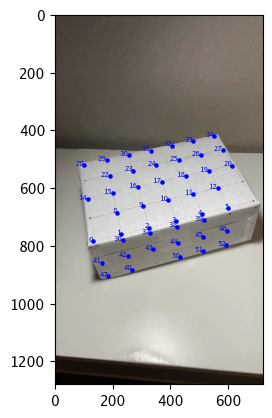

In [37]:
# Sanity check
display_projected_pts(450)

## Projecting Cube onto Scene

In [5]:
import cv2
# Draw function from openCV docs
def draw(img, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = img.copy()
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(0,0,255),3)
    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(255,0,0),3)
    return img
l = 7 #box has length of 7 
axis = np.float32([[0,0,0], [0,l,0], [l,l,0], [l,0,0],
                   [0,0,-l],[0,l,-l],[l,l,-l],[l,0,-l] ])
axis[4:, -1] += l*2
axis[:,-1] += 17 # shift up
axis[:, 0] += 8.9+7
axis[:, 1] += 8.65

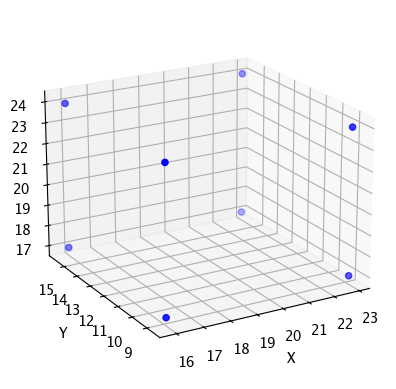

In [42]:
plot_3d(axis)

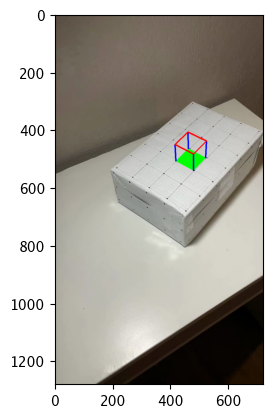

In [43]:
t = 3
curr_p = get_p(t)
projected_cube = apply_p(curr_p, axis)
plt.imshow(draw(get_frame(t), projected_cube))

In [1136]:
box_frames = []
for t in range(T):
    curr_p = get_p(t)
    projected_cube = apply_p(curr_p, axis)
    box_frames.append(draw(get_frame(t), projected_cube))

In [1140]:
save_video_from_frames(box_frames, 'box_tracking')

## Placing Mesh

In [83]:
import cv2
key_points_all = load_arr('keypts.npz')
key_points_nums = load_arr('keypts_nums.npz')
all_p = load_arr('all_p.npy')
T = 499
intrinsics_guess = np.array([[1279, 0, 294],
                                [0, 1319, 655],
                                [0, 0, 1]], dtype=np.float32)
def get_camera_pose(rot, tran):
    R, _ = cv2.Rodrigues(rot)
    camera_pose = np.row_stack((np.column_stack((R, tran)), [0, 0, 0, 1]))
    return np.linalg.inv(camera_pose)

In [84]:
all_frame_3d_pts = [all_3d_points[key_points_nums[i].astype(np.int32)].astype(np.float32) for i in range(T)]
key_points_all = [arr.astype(np.float32) for arr in key_points_all]

In [85]:
# keypts = [get_frame_keypts(0).astype(np.float32)]
# world_pts = [all_3d_points[get_frame_keypts_idx(0)].astype(np.float32)]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    all_frame_3d_pts, key_points_all, get_frame(0).shape[:-1], 
    cameraMatrix=intrinsics_guess, distCoeffs=None,
    flags=cv2.CALIB_USE_INTRINSIC_GUESS
)
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
#     [all_frame_3d_pts[0]], [key_points_all[0]], get_frame(0).shape[:-1], 
#     cameraMatrix=intrinsics_guess, distCoeffs=None,
#     flags=cv2.CALIB_USE_INTRINSIC_GUESS
# )

In [88]:
c2ws_test = []
for t in range(T):
    rot, tran = rvecs[t], tvecs[t]
    tran = np.asarray(tran)
    if len(tran.shape) != 2: tran.squeeze(0)
    tran[1:] *= -1
    rot[1:] *= -1
    c2w = get_camera_pose(rot, tran)
    c2ws_test.append(c2w)

In [87]:
ret, mtx, dist

(3.293136862766638,
 array([[1.21863753e+03, 0.00000000e+00, 1.52592580e+02],
        [0.00000000e+00, 1.25537527e+03, 7.29419243e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-1.03976658,  4.17390956,  0.01920464,  0.01533265, -6.65841783]]))

In [14]:
intrinsics_guess = np.array([[1200, 0, 360],
                                [0, 1200, 640],
                                [0, 0, 1]], dtype=np.float32)
# print(all_frame_3d_pts[0].shape, key_points_all[0].shape)
# ret2, vecs2, tvecs2, _ = cv2.solvePnP(
#     np.zeros_like((5,3)).astype(np.float32), np.zeros_like((5,2)).astype(np.float32),
#     # all_frame_3d_pts[0], key_points_all[0],
#     intrinsics_guess, None, flags=cv2.SOLVEPNP_SQPNP
# )

trans, rots = [], []
c2ws = []
T=499
for t in range(T):
    ret2, rot, tran = cv2.solvePnP(
        all_frame_3d_pts[t], key_points_all[t].astype(np.float32), intrinsics_guess, None, flags=cv2.SOLVEPNP_SQPNP
    )
    tran = np.asarray(tran)
    if len(tran.shape) != 2: tran.squeeze(0)
    tran[1:] *= -1
    rot[1:] *= -1
    trans.append(tran)
    rots.append(rot)
    c2w = get_camera_pose(rot, tran)
    c2ws.append(c2w)

In [15]:
def get_proj_cv2(intrin, rot, tran):
    return intrin @ get_camera_pose(rot, tran)
def get_proj_cv2_t(intrin, t):
    return (intrin @ np.linalg.inv(c2ws[t])[:3])

In [89]:
fx, fy, cx, cy = 0,0,0,0
def set_intrinsics(mat):
    global fx, fy, cx, cy
    fx = mat[0,0]
    fy = mat[1,1]
    cx = mat[0,2]
    cy = mat[1,2]
set_intrinsics(mtx)
fx, fy, cx, cy

(1218.6375348044407, 1255.3752744670319, 152.59257970561964, 729.4192433381156)

In [ ]:
import trimesh
import pyrender
import cv2


# fuze_trimesh = trimesh.load('img_in/fuze.obj')
# mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
# mesh = trimesh.creation.box()
# mesh = pyrender.Mesh.from_trimesh(mesh, smooth=False)
mesh_frames = []
intrinsics_matrix = np.array([[fx, 0, cx],
                              [0, fy, cy],
                              [0, 0, 1]])
# Create an offscreen renderer
width, height = 720, 1280 
renderer = pyrender.OffscreenRenderer(width, height)

for t in range(T):
    scene = pyrender.Scene(ambient_light=[.1, .1, .3], bg_color=[0, 0, 0])
    # Load or create your 3D mesh 
    sphere = trimesh.creation.icosphere(subdivisions=4, radius=16)
    sphere.vertices+=1e-2*np.random.randn(*sphere.vertices.shape)
    mesh = pyrender.Mesh.from_trimesh(sphere, smooth=False)
    print(t)
    # Add the mesh to the scene
    mesh_pos = np.eye(4)
    # mesh_pos[0, 3] += 2
    # mesh_pos[1, 3] += -7
    # mesh_pos[2, 3] += -2
    scene.add(mesh, pose=np.eye(4))

    # Create a pyrender camera with intrinsic and extrinsic parameters
    camera = pyrender.IntrinsicsCamera(intrinsics_matrix[0, 0], intrinsics_matrix[1, 1],
                                        intrinsics_matrix[0, 2], intrinsics_matrix[1, 2])
    scene.add(camera, pose=c2ws[t])
    # print(c2ws[t])
    light = pyrender.DirectionalLight(color=[1,1,1], intensity=2e3)

    scene.add(light, pose=c2ws[0])

    # Render the scene
    color, depth = renderer.render(scene)

    # Display the rendered image using OpenCV
    # cv2.imshow('Rendered Image', color)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    mask = np.expand_dims(depth, -1).repeat(3, axis=-1)
    result = np.where(mask>0, color, get_frame(t))
    mesh_frames.append(result)
    # save_img('mesh_{0}'.format(t), result, out_dir=img_out+'/mesh_images/')
    # plt.imshow(result)
    # print(mask)
    # save_img('mesh_{0}'.format(t), result, out_dir=img_out+'/mesh_images/')

376


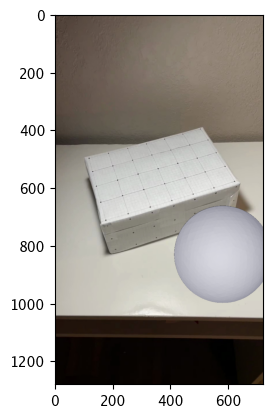

In [117]:
# Create a pyrender scene
t=376
scene = pyrender.Scene(ambient_light=[.1, .1, .3], bg_color=[0, 0, 0])
# Load or create your 3D mesh 
sphere = trimesh.creation.icosphere(subdivisions=4, radius=16)
sphere.vertices+=1e-2*np.random.randn(*sphere.vertices.shape)
mesh = pyrender.Mesh.from_trimesh(sphere, smooth=False)
print(t)
# Add the mesh to the scene
mesh_pos = np.eye(4)
# mesh_pos[0, 3] += 2
# mesh_pos[1, 3] += -7
# mesh_pos[2, 3] += -2
scene.add(mesh, pose=np.eye(4))

# Create a pyrender camera with intrinsic and extrinsic parameters
camera = pyrender.IntrinsicsCamera(intrinsics_matrix[0, 0], intrinsics_matrix[1, 1],
                                    intrinsics_matrix[0, 2], intrinsics_matrix[1, 2])
scene.add(camera, pose=c2ws_test[170])
# print(c2ws[t])
light = pyrender.DirectionalLight(color=[1,1,1], intensity=2e3)

scene.add(light, pose=c2ws_test[0])

# Render the scene
color, depth = renderer.render(scene)

# Display the rendered image using OpenCV
# cv2.imshow('Rendered Image', color)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
mask = np.expand_dims(depth, -1).repeat(3, axis=-1)
result = np.where(mask>0, color, get_frame(t))
# mesh_frames.append(result)
# save_img('mesh_{0}'.format(t), result, out_dir=img_out+'/mesh_images/')
plt.imshow(result)

In [58]:
save_video_from_frames(mesh_frames, 'mesh_video')